<a href="https://colab.research.google.com/github/KrishnaMoorthy47/Projects/blob/main/Drug_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Introduction**:
Drug classification is an important problem in the field of healthcare, as it helps doctors to make informed decisions about which drugs to prescribe for their patients. With the increasing availability of medical records and healthcare data, machine learning models can be trained to accurately predict which drug is most appropriate for a given patient.

In this project, we will be working with a dataset containing information about various drugs and their properties, as well as patient health indicators. Our goal is to develop a machine learning model that can accurately predict the most appropriate drug for a given patient based on their characteristics.

By accurately predicting which drug is best suited for a given patient, our model can help to improve patient outcomes and reduce healthcare costs. We hope that this project will provide valuable insights into the field of drug classification and its potential to transform healthcare. 


### **Dataset**

The dataset used in this project contains information about 200 patients and the drugs they were prescribed. The dataset includes the following features:

- **Age**: The age of the patient in years
- **Sex**: The patient's gender (M/F)
- **Blood Pressure**: The patient's blood pressure level (high/low)
- **Cholesterol**: The patient's cholesterol level (high/low)
- **Na_to_K**: The ratio of sodium to potassium in the patient's blood
- **Drug_Type**: The type of drug prescribed to the patient



### **Objectives**:
*   Dataset exploration using various types of data visualization.

*   Build various ML models that can predict drug type



### **Importing Libraries**

We will be using the following libraries in this project:

- **Pandas**: for data manipulation and analysis
- **Numpy**: for numerical computing
- **Scikit-learn**: for machine learning algorithms
- **Matplotlib** and **seaborn**: for data visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Reading the Data**

In [ ]:
df = pd.read_csv("/content/drug_classification.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
# Checking Null values
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug_Type      0
dtype: int64

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug_Type    200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.Drug_Type.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug_Type, dtype: int64

## **Exploratory Data Analysis**
Before we build our classification model, let's take a closer look at the dataset and try to gain some insights from the data. We will start by examining the distribution of the different drug types in the dataset.

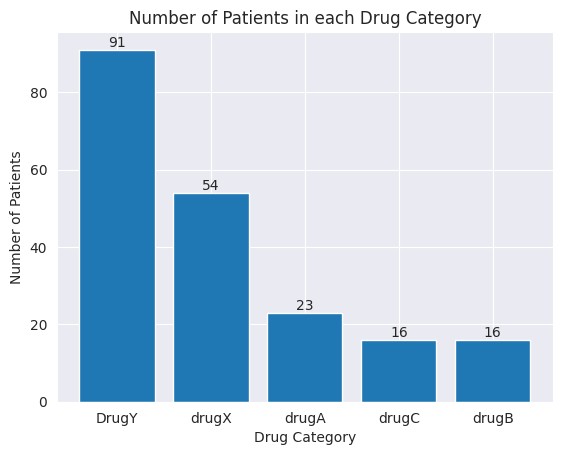

In [ ]:
# Create a bar chart of the number of patients in each drug category

sns.set_style("darkgrid")

drug_counts = df["Drug_Type"].value_counts()
plt.bar(drug_counts.index, drug_counts.values)
plt.title("Number of Patients in each Drug Category")
plt.xlabel("Drug Category")
plt.ylabel("Number of Patients")
for x, y in zip(drug_counts.index, drug_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.show()

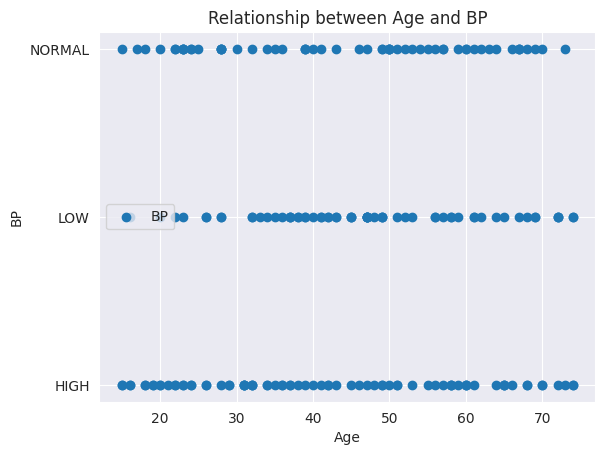

In [ ]:
plt.scatter(x='Age', y='BP', data=df)
plt.xlabel('Age')
plt.ylabel('BP')
plt.title('Relationship between Age and BP')
plt.legend()

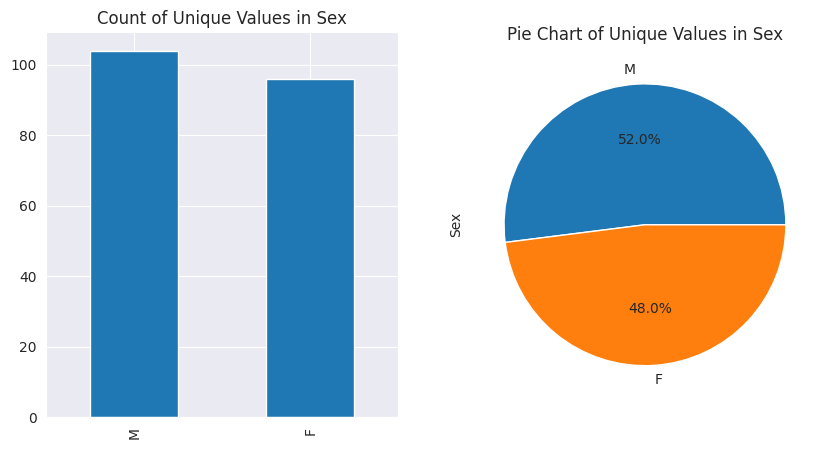

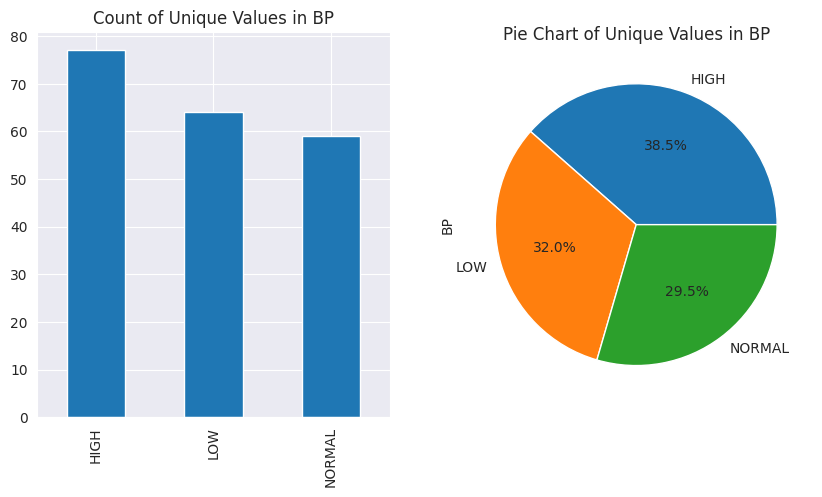

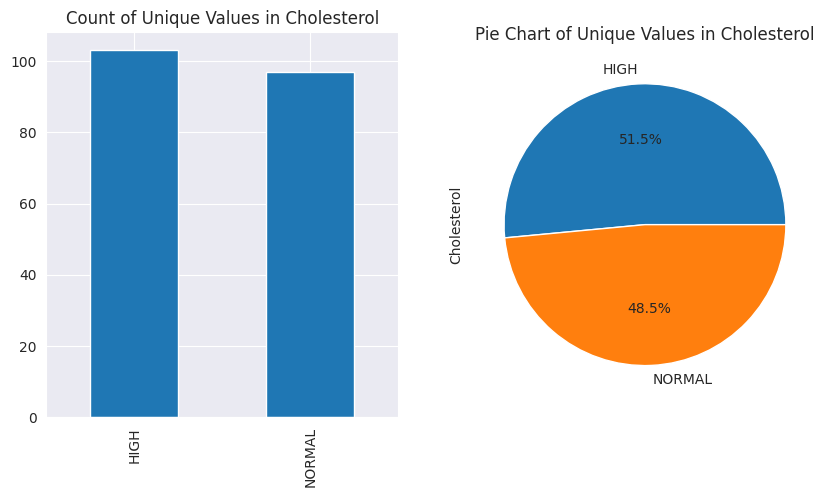

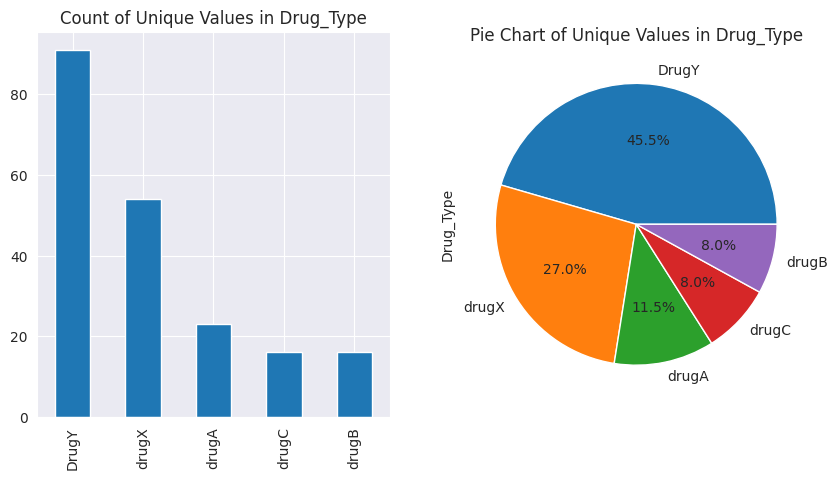

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Sex', 'BP', 'Cholesterol', 'Drug_Type']

for col in categorical_cols:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    df[col].value_counts().plot(kind='bar', ax=axs[0])
    axs[0].set_title(f'Count of Unique Values in {col}')
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[1])
    axs[1].set_title(f'Pie Chart of Unique Values in {col}')
    plt.show()


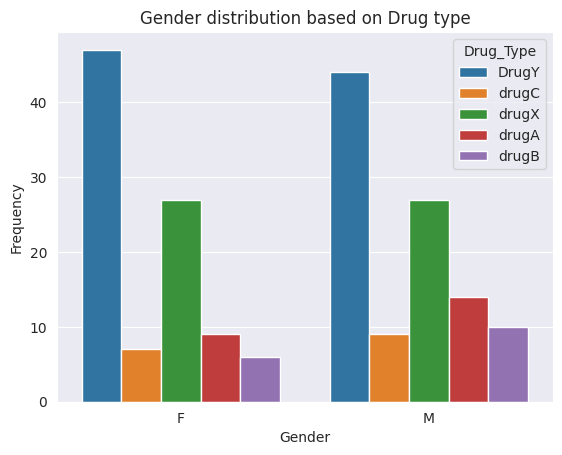

In [ ]:
import seaborn as sns

sns.countplot(data=df, x='Sex', hue='Drug_Type')
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


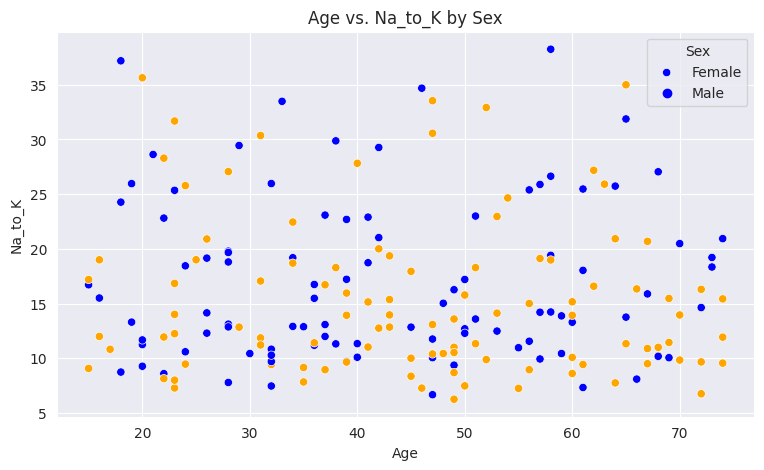

In [ ]:
plt.figure(figsize = (9,5))
sns.scatterplot(x = "Age", y = "Na_to_K", hue = "Sex", data = df, palette = ["blue", "orange"])
plt.legend(title='Sex', loc='upper right', labels=['Female', 'Male'])
plt.title("Age vs. Na_to_K by Sex")
plt.show()

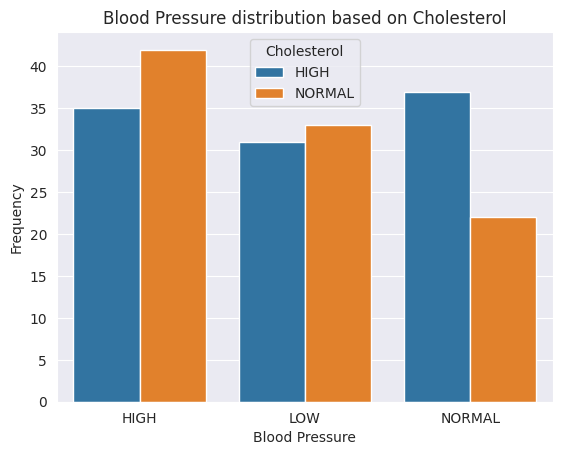

In [ ]:
# blood pressure vs cholesterol
sns.countplot(data=df, x='BP', hue='Cholesterol')
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

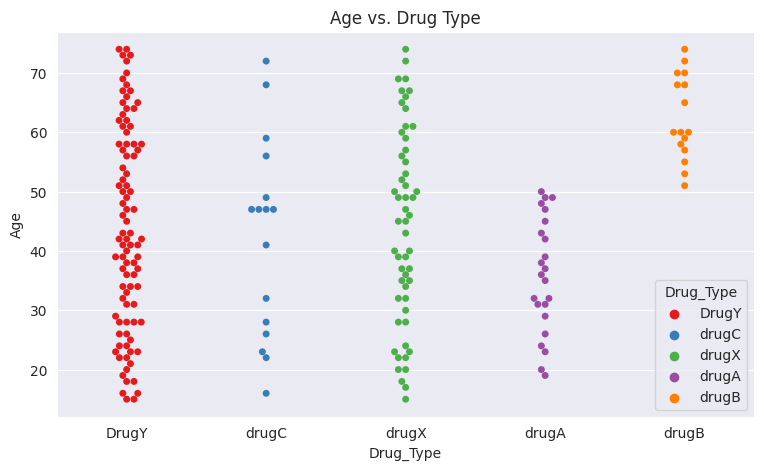

In [ ]:
plt.figure(figsize = (9,5))
sns.swarmplot(x="Drug_Type", y="Age", data=df, hue="Drug_Type", palette="Set1")
plt.title("Age vs. Drug Type")
plt.show()


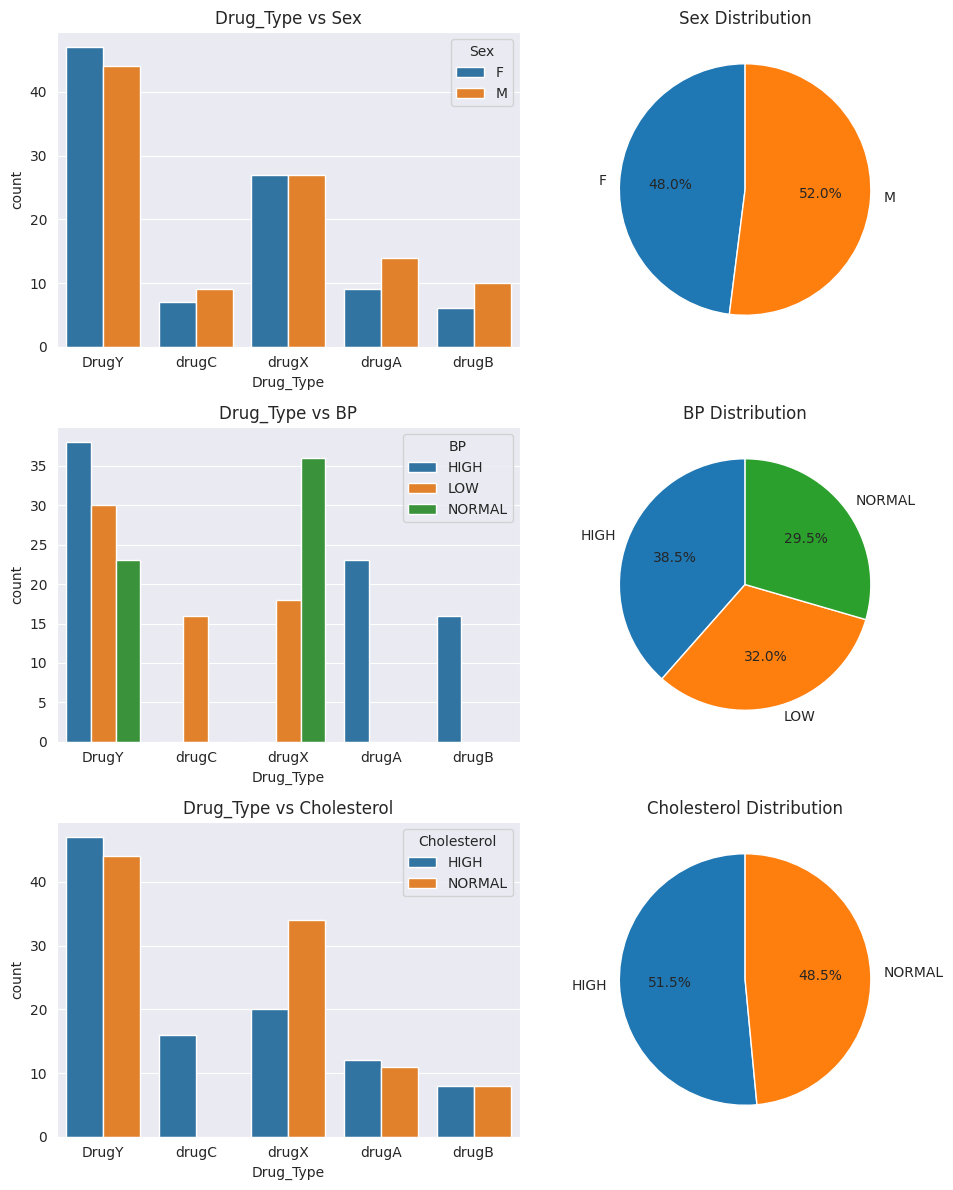

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for 3 columns
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

# Plot for 'Sex'
sns.countplot(x='Drug_Type', hue='Sex', data=df, ax=axs[0][0])
axs[0][0].set_title('Drug_Type vs Sex')

# Pie chart for 'Sex'
sex_count = df.groupby('Sex').size().reset_index(name='counts')
axs[0][1].pie(sex_count['counts'], labels=sex_count['Sex'], autopct='%1.1f%%', startangle=90)
axs[0][1].set_title('Sex Distribution')

# Plot for 'BP'
sns.countplot(x='Drug_Type', hue='BP', data=df, ax=axs[1][0])
axs[1][0].set_title('Drug_Type vs BP')

# Pie chart for 'BP'
bp_count = df.groupby('BP').size().reset_index(name='counts')
axs[1][1].pie(bp_count['counts'], labels=bp_count['BP'], autopct='%1.1f%%', startangle=90)
axs[1][1].set_title('BP Distribution')

# Plot for 'Cholesterol'
sns.countplot(x='Drug_Type', hue='Cholesterol', data=df, ax=axs[2][0])
axs[2][0].set_title('Drug_Type vs Cholesterol')

# Pie chart for 'Cholesterol'
cholesterol_count = df.groupby('Cholesterol').size().reset_index(name='counts')
axs[2][1].pie(cholesterol_count['counts'], labels=cholesterol_count['Cholesterol'], autopct='%1.1f%%', startangle=90)
axs[2][1].set_title('Cholesterol Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


In [ ]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20', '20', '30', '40', '50', '60', '>60']
df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age, include_lowest=True)

In [ ]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df = df.drop(['Na_to_K'], axis = 1)

In [ ]:
df['Sex'] = df.Sex.replace(['M', 'F'], [1, 2])
df['BP'] = df.BP.replace(['HIGH', 'NORMAL', 'LOW'], [2,1,0])
df['Cholesterol'] = df.Cholesterol.replace(['HIGH', 'NORMAL'], [2,1])
df['Drug_Type'] = df.Drug_Type.replace(['DrugY', 'drugX', 'drugA', 'drugC', 'drugB'], [1,2,3,4,5])

In [ ]:
class_dist = df['Drug_Type'].value_counts(normalize=True) * 100
print(class_dist)

1    45.5
2    27.0
3    11.5
4     8.0
5     8.0
Name: Drug_Type, dtype: float64


### **Model Building**

Now that we have preprocessed the data and gained some insights from the data, we can start building our classification model.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Encode categorical features
cols = ['Sex', 'BP', 'Cholesterol', 'Age_binned']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

# Split the dataset into training and testing sets
x = df.drop(columns=['Drug_Type'])
y = df['Drug_Type']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)


x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)


from imblearn.over_sampling import SMOTE

x_train, y_train = SMOTE().fit_resample(x_train, y_train)

x_train shape: (160, 6)
x_test shape: (40, 6)
y_train shape: (160, 1)
y_test shape: (40, 1)


[Text(0.5, 0, 'Drug_Type')]

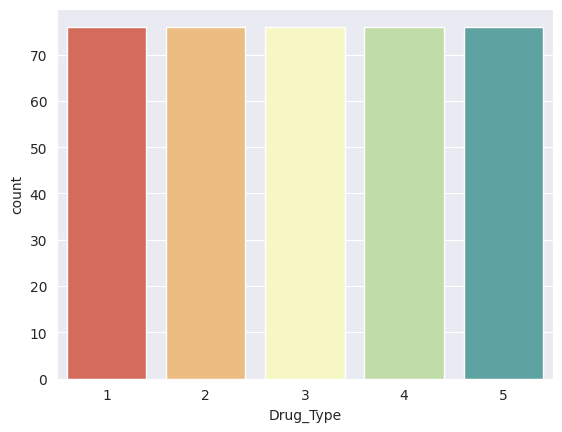

In [ ]:
ax = sns.countplot(x=y_train, data=df, palette='Spectral')
ax.set(xlabel="Drug_Type")

In [ ]:
print("ORIGINAL dataset:", len(df), "\n EXTENDED dataset:",len(y))

ORIGINAL dataset: 200 
 EXTENDED dataset: 200


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression(solver='liblinear')

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [1000]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=kf)

Best parameters:  {'C': 10, 'max_iter': 1000, 'penalty': 'l1'}
Best score:  0.8868421052631579


In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 10, max_iter = 1000, penalty = 'l1', solver = 'liblinear', random_state = 42)

LR.fit(x_train, y_train)

LogisticRegression(C=10, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [ ]:
y_pred = LR.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.93      0.87      0.90        15
           2       0.92      1.00      0.96        11
           3       0.83      0.83      0.83         6
           4       0.80      0.80      0.80         5
           5       1.00      1.00      1.00         3

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40

[[13  0  1  1  0]
 [ 0 11  0  0  0]
 [ 1  0  5  0  0]
 [ 0  1  0  4  0]
 [ 0  0  0  0  3]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

KNN = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

grid_search = GridSearchCV(KNN, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5)
print("CV results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

kf = KFold(n_splits=5)
kf_results = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=kf)
print("KF results:", kf_results)
print("Mean KF accuracy:", kf_results.mean())

Best parameters:  {'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'uniform'}
Best score:  0.7447368421052631
CV results: [0.67105263 0.68421053 0.73684211 0.78947368 0.84210526]
Mean CV accuracy: 0.7447368421052631
KF results: [0.61842105 0.46052632 0.82894737 0.65789474 0.84210526]
Mean KF accuracy: 0.6815789473684211


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(algorithm = 'brute', n_neighbors = 3, weights = 'uniform')

KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=3)

In [ ]:
y_pred = KNN.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.47      0.60      0.53        15
           2       0.57      0.36      0.44        11
           3       1.00      0.50      0.67         6
           4       0.25      0.40      0.31         5
           5       0.67      0.67      0.67         3

    accuracy                           0.50        40
   macro avg       0.59      0.51      0.52        40
weighted avg       0.57      0.50      0.51        40

[[9 2 0 4 0]
 [5 4 0 1 1]
 [2 0 3 1 0]
 [2 1 0 2 0]
 [1 0 0 0 2]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score

RF = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=kf)
print("CV results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

Best parameters:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.9026315789473685
CV results: [0.90789474 0.88157895 0.89473684 0.90789474 0.92105263]
Mean CV accuracy: 0.9026315789473685


In [ ]:
RF = RandomForestClassifier(max_depth = 5, max_features = 'sqrt', min_samples_split = 2, n_estimators = 200)

RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [ ]:
y_pred = RF.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      0.67      0.77        15
           2       0.79      1.00      0.88        11
           3       1.00      0.83      0.91         6
           4       0.83      1.00      0.91         5
           5       0.75      1.00      0.86         3

    accuracy                           0.85        40
   macro avg       0.86      0.90      0.86        40
weighted avg       0.87      0.85      0.84        40

[[10  3  0  1  1]
 [ 0 11  0  0  0]
 [ 1  0  5  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0  3]]


<ipython-input-58-b87fe6609978>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(x.columns, rotation=90)


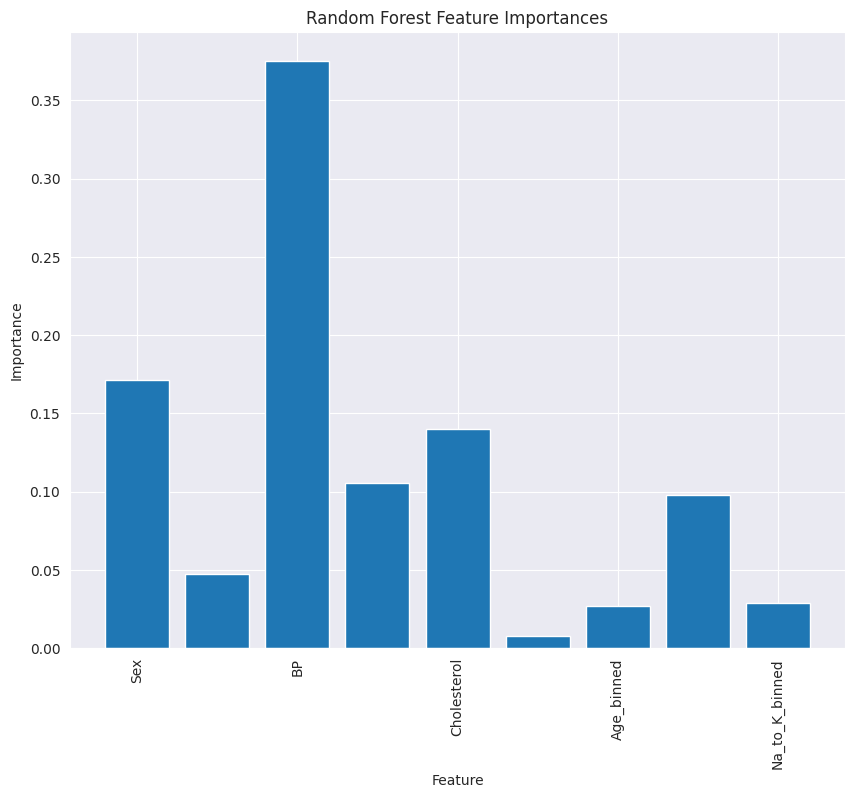

In [ ]:
FE = RF.feature_importances_

plt.figure(figsize=(10, 8))
plt.bar(range(len(FE)), FE)
plt.gca().set_xticklabels(x.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score

DT = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=DT, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=kf)
print("CV results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Best score:  0.8947368421052632
CV results: [0.88157895 0.89473684 0.86842105 0.89473684 0.90789474]
Mean CV accuracy: 0.8894736842105264


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split = 2)

DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred = DT.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.87      0.93        15
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         6
           4       0.83      1.00      0.91         5
           5       0.75      1.00      0.86         3

    accuracy                           0.95        40
   macro avg       0.92      0.97      0.94        40
weighted avg       0.96      0.95      0.95        40

[[13  0  0  1  1]
 [ 0 11  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0  3]]


<ipython-input-63-70942582959c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(x.columns, rotation=90)


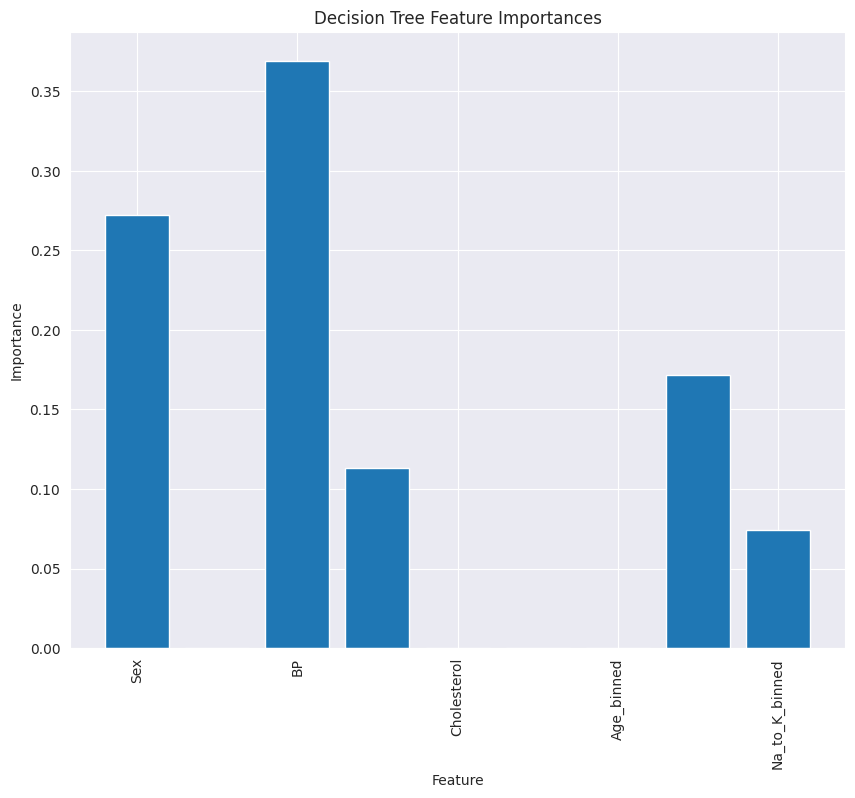

In [ ]:
FE = DT.feature_importances_

plt.figure(figsize=(10, 8))
plt.bar(range(len(FE)), FE)
plt.gca().set_xticklabels(x.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importances')
plt.show()

In [ ]:
models = [('Logistic Regression', LR), ('Random Forest', RF), ('Decision Tree', DT), ('KNN', KNN)]

# Train and evaluate the models
best_model = None
best_score = 0
for name, model in models:
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred) 
    precision = precision_score(y_test, y_pred, average='macro') 
    recall = recall_score(y_test, y_pred, average='macro') 
    f1 = f1_score(y_test, y_pred, average='macro') 
    score = accuracy * precision * recall * f1
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy*100:.2f}%") 
    print(f"Precision: {precision*100:.2f}%") 
    print(f"Recall: {recall*100:.2f}%") 
    print(f"F1-score: {f1*100:.2f}%") 
    print(f"Score: {score:.2f}") 
    print("\n")
    
    # Check if the current model is the best one
    if score > best_score:
        best_model = name
        best_score = score

# Print the best model and its score
print(f"The best model is {best_model} with a score of {best_score*100:.2f}%")



Model: Logistic Regression
Accuracy: 90.00%
Precision: 89.57%
Recall: 90.00%
F1-score: 89.73%
Score: 0.65


Model: Random Forest
Accuracy: 85.00%
Precision: 85.56%
Recall: 90.00%
F1-score: 86.49%
Score: 0.57


Model: Decision Tree
Accuracy: 95.00%
Precision: 91.67%
Recall: 97.33%
F1-score: 93.90%
Score: 0.80


Model: KNN
Accuracy: 50.00%
Precision: 59.24%
Recall: 50.61%
F1-score: 52.30%
Score: 0.08


The best model is Decision Tree with a score of 79.59%


## **Conclusion**

In this project, we explored a dataset of drugs and their features, and used machine learning algorithms to classify the drugs based on their type. 

We started by performing exploratory data analysis to get a better understanding of the dataset, which included visualizations and statistical analysis. 

We then preprocessed the data by encoding categorical features, scaling numerical features, and splitting the data into training and testing sets. We then trained several classification models, including Logistic Regression, Random Forest, and Decision Tree, and KNN. We evaluated their performance using accuracy, precision, recall, and F1-score metrics. 

Overall, our analysis shows that machine learning can be a useful tool for drug classification, and can potentially help in drug discovery and development. 

In conclusion, this project demonstrates the potential of machine learning in drug classification, and provides insights into the features and models that can be used for this task.
